# Train a gesture recognition model for microcontroller (ESP32) use

This notebook demonstrates how to train a 20kb gesture recognition model for [TensorFlow Lite for Microcontrollers](https://tensorflow.org/lite/microcontrollers/overview). It will produce the same model used in the [magic_wand_esp32_mpu6050](https://github.com/stefan/MagicWand-TFLite-ESP32-MPU6050/blob/main/magic_wand_esp32_mpu6050) application.

The model is designed to be used with [Google Colaboratory](https://colab.research.google.com).

<table class="tfo-notebook-buttons" align="left">
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/stefan-spiss/MagicWand-TFLite-ESP32-MPU6050/blob/main/train/train_magic_wand_model.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />Run in Google Colab</a>
  </td>
  <td>
    <a target="_blank" href="https://github.com/stefan-spiss/MagicWand-TFLite-ESP32-MPU6050/blob/main/train/train_magic_wand_model.ipynb"><img src="https://www.tensorflow.org/images/GitHub-Mark-32px.png" />View source on GitHub</a>
  </td>
</table>


Training is much faster using GPU acceleration. Before you proceed, ensure you are using a GPU runtime by going to **Runtime -> Change runtime type** and selecting **GPU**. Training will take around 5 minutes on a GPU runtime.

## Configure dependencies

Run the following cell to ensure the correct version of TensorFlow is used.

We'll also clone the TensorFlow repository, which contains the training scripts, and copy them into our workspace.

In [ ]:
# Clone the repository from GitHub
!git clone --depth 1 -q https://github.com/abhyanth-learner/MagicWand-TFLite-ESP32-MPU6050.git
# Copy the training scripts into our workspace
!cp -r MagicWand-TFLite-ESP32-MPU6050/train train

## Prepare the data

Next, we'll extract the data into the expected location within the training scripts' directory.

In [ ]:
# Extract the data into the train directory
!unzip  MagicWand-TFLite-ESP32-MPU6050/data/data.zip -d train
#!tar xvzf data.tar.gz -C train 1>/dev/null

Archive:  MagicWand-TFLite-ESP32-MPU6050/data/data.zip
   creating: train/data/
   creating: train/data/ring/
  inflating: train/data/ring/output_ring_patrick.txt  
  inflating: train/data/ring/output_ring_stefan.txt  
  inflating: train/data/ring/output_ring_justin.txt  
  inflating: train/data/ring/output_ring_yeongmi.txt  
   creating: train/data/slope/
  inflating: train/data/slope/output_slope_stefan.txt  
  inflating: train/data/slope/output_slope_justin.txt  
  inflating: train/data/slope/output_slope_patrick.txt  
  inflating: train/data/slope/output_slope_yeongmi.txt  
   creating: train/data/wing/
  inflating: train/data/wing/output_wing_stefan.txt  
  inflating: train/data/wing/output_wing_patrick.txt  
  inflating: train/data/wing/output_wing_yeongmi.txt  


We now inspect the data by plotting it.

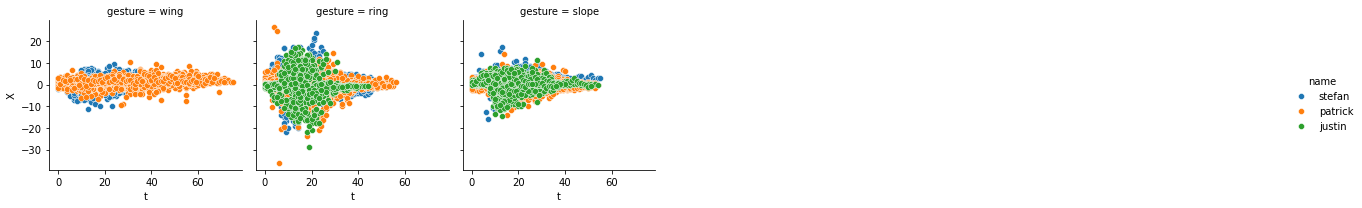

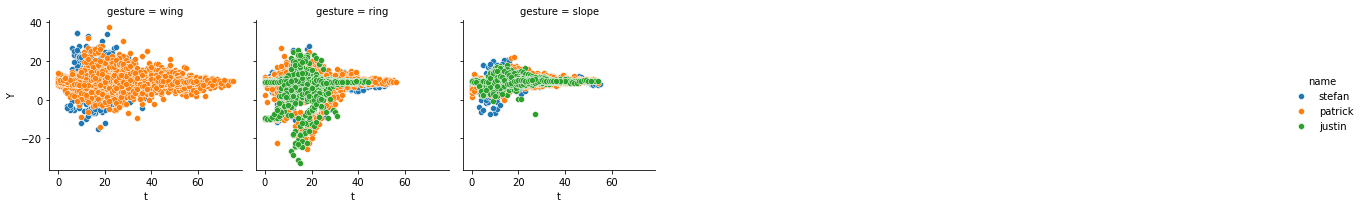

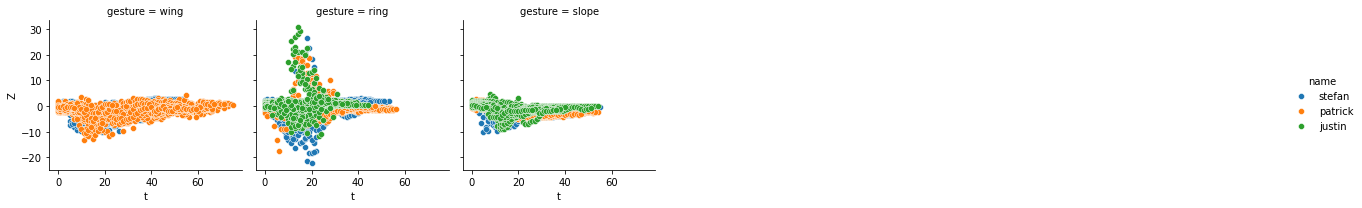

In [7]:
# The scripts must be run from within the train directory
# %cd train
# Plot the data
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sb
import numpy as np
import math

from data_prepare import prepare_original_data
# from data_prepare import generate_negative_data

LABEL_NAME = "gesture"
DATA_NAME = "accel_ms2_xyz"
folders = ["wing", "ring", "slope"]
names = [
    "stefan",
    "patrick",
    "justin",
    "yeongmi"
    "arthur",
    "kai",
    "nico"
]

data = []  # pylint: disable=redefined-outer-name
for idx1, folder in enumerate(folders):
  for idx2, name in enumerate(names):
    prepare_original_data(folder, name, data,
                          "./data/%s/output_%s_%s.txt" % (folder, folder, name))
n_gestures = len(data)
# for idx, name in enumerate(names):
#   prepare_original_data("negative", name, data,
#                         "./data/negative/output_negative_%s.txt" % (name))
# n_negative = len(data) - n_gestures
# folders.append("negative")

# # if there are more than 10% more gesture samples per gesture as negative samples, generate additional negative
# # samples
# if n_gestures - n_negative * len(folders) > n_gestures/len(folders) * 0.1:
#   print("not enough negative samples available, creating random data samples")
#   generate_negative_data(data, (math.ceil(n_gestures/len(folders)) - n_negative))
# n_negative = len(data) - n_gestures

columns = [LABEL_NAME, "name", DATA_NAME]
df = pd.DataFrame(data, columns=columns)
  
df_gesture_data = pd.DataFrame()
for folder in folders:
  for row in df.loc[df[LABEL_NAME] == folder].iterrows():
    tmp_data = np.array(row[1][DATA_NAME])
    df_tmp = pd.DataFrame({
      "name": np.full(len(tmp_data), row[1]["name"]), 
      LABEL_NAME: np.full(len(tmp_data), folder),
      "t": range(len(tmp_data)),
      "X": tmp_data[:, 0],
      "Y": tmp_data[:, 1],
      "Z": tmp_data[:, 2]
      })
    df_gesture_data = pd.concat([df_gesture_data, df_tmp], ignore_index=True)

# print(df_gesture_data)
# sb.scatterplot(data = df_gesture_data, x = "t", y = "X", col)
# for folder in folders:
#   grid_X = sb.FacetGrid(df_gesture_data.loc[df_gesture_data[LABEL_NAME] == folder], col = "name", hue = LABEL_NAME, col_wrap=3)
#   grid_X.map(sb.scatterplot, "t", "X")
#   grid_X.add_legend()
#   grid_Y = sb.FacetGrid(df_gesture_data.loc[df_gesture_data[LABEL_NAME] == folder], col = "name", hue = LABEL_NAME, col_wrap=3)
#   grid_Y.map(sb.scatterplot, "t", "Y")
#   grid_Y.add_legend()
#   grid_Z = sb.FacetGrid(df_gesture_data.loc[df_gesture_data[LABEL_NAME] == folder], col = "name", hue = LABEL_NAME, col_wrap=3)
#   grid_Z.map(sb.scatterplot, "t", "Z")
#   grid_Z.add_legend()

grid_X = sb.FacetGrid(df_gesture_data, col = LABEL_NAME, hue = "name", col_wrap=len(names))
grid_X.map(sb.scatterplot, "t", "X")
grid_X.add_legend()
grid_Y = sb.FacetGrid(df_gesture_data, col = LABEL_NAME, hue = "name", col_wrap=len(names))
grid_Y.map(sb.scatterplot, "t", "Y")
grid_Y.add_legend()
grid_Z = sb.FacetGrid(df_gesture_data, col = LABEL_NAME, hue = "name", col_wrap=len(names))
grid_Z.map(sb.scatterplot, "t", "Z")
grid_Z.add_legend()

plt.show()

We'll then run the scripts that split the data into training, validation, and test sets.

In [1]:
# Prepare the data
!python data_prepare.py
# Split the data by person
#!python data_split_person.py
# Split the data randomly since only one person available
!python data_split.py

gesture_data_length: 282
data_length: 282
data_length:282
{'wing': 74, 'ring': 111, 'slope': 97}
train_length:168
test_length:59


## Load TensorBoard

Now, we set up TensorBoard so that we can graph our accuracy and loss as training proceeds.

In [ ]:
# Load TensorBoard
%load_ext tensorboard
%tensorboard --logdir logs/scalars

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


Reusing TensorBoard on port 6006 (pid 163), started 0:00:16 ago. (Use '!kill 163' to kill it.)

<IPython.core.display.Javascript object>

## Begin training

The following cell will begin the training process. Training will take around 5 minutes on a GPU runtime. You'll see the metrics in TensorBoard after a few epochs.

In [2]:
#!python train.py --model CNN --person true
!python train.py --model CNN

Start to load data...
train_data_length:4200
valid_data_length:55
test_data_length:59
Start to build net...
Built CNN.
Start training...
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 3, 8)         104       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 42, 1, 8)         0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 42, 1, 8)          0         
                                                                 
 conv2d_1 (Conv2D)           (None, 42, 1, 16)         528       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 14, 1, 16)        0         
 2D)                                               

2022-04-14 23:18:17.652755: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'cudart64_110.dll'; dlerror: cudart64_110.dll not found
2022-04-14 23:18:17.652802: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2022-04-14 23:18:22.738599: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'cudart64_110.dll'; dlerror: cudart64_110.dll not found
2022-04-14 23:18:22.739141: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'cublas64_11.dll'; dlerror: cublas64_11.dll not found
2022-04-14 23:18:22.739658: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'cublasLt64_11.dll'; dlerror: cublasLt64_11.dll not found
2022-04-14 23:18:22.740162: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'cu

1000/1000 [==============================] - 6s 6ms/step - loss: 0.4837 - accuracy: 0.8020 - val_loss: 0.2500 - val_accuracy: 0.9455
Epoch 3/10

1000/1000 [==============================] - 7s 7ms/step - loss: 0.2842 - accuracy: 0.8916 - val_loss: 0.1425 - val_accuracy: 0.9727
Epoch 4/10

1000/1000 [==============================] - 8s 8ms/step - loss: 0.1888 - accuracy: 0.9296 - val_loss: 0.0814 - val_accuracy: 0.9909
Epoch 5/10

1000/1000 [==============================] - 8s 8ms/step - loss: 0.1428 - accuracy: 0.9478 - val_loss: 0.0366 - val_accuracy: 0.9909
Epoch 6/10

1000/1000 [==============================] - 8s 8ms/step - loss: 0.1083 - accuracy: 0.9615 - val_loss: 0.0376 - val_accuracy: 0.9818
Epoch 7/10

1000/1000 [==============================] - 8s 8ms/step - loss: 0.0860 - accuracy: 0.9701 - val_loss: 0.0186 - val_accuracy: 0.9909
Epoch 8/10

1000/1000 [==============================] - 8s 8ms/step - loss: 0.0743 - accuracy: 0.9745 - val_loss: 0.0036 - val_accuracy: 1.00

In [ ]:
## Create a C source file

The `train.py` script writes a model, `model.tflite`, to the training scripts' directory.

In the following cell, we convert this model into a C++ source file we can use with TensorFlow Lite for Microcontrollers.

In [ ]:
# Install xxd if it is not available
!apt-get -qq install xxd
# Save the file as a C source file
!xxd -i model.tflite > /content/model.cc
# Print the source file
!cat /content/model.cc

Selecting previously unselected package xxd.
(Reading database ... 156210 files and directories currently installed.)
Preparing to unpack .../xxd_2%3a8.0.1453-1ubuntu1.8_amd64.deb ...
Unpacking xxd (2:8.0.1453-1ubuntu1.8) ...
Setting up xxd (2:8.0.1453-1ubuntu1.8) ...
Processing triggers for man-db (2.8.3-2ubuntu0.1) ...
unsigned char model_tflite[] = {
  0x1c, 0x00, 0x00, 0x00, 0x54, 0x46, 0x4c, 0x33, 0x14, 0x00, 0x20, 0x00,
  0x04, 0x00, 0x08, 0x00, 0x0c, 0x00, 0x10, 0x00, 0x14, 0x00, 0x00, 0x00,
  0x18, 0x00, 0x1c, 0x00, 0x14, 0x00, 0x00, 0x00, 0x03, 0x00, 0x00, 0x00,
  0x18, 0x00, 0x00, 0x00, 0x2c, 0x00, 0x00, 0x00, 0x58, 0x01, 0x00, 0x00,
  0x2c, 0x00, 0x00, 0x00, 0x00, 0x01, 0x00, 0x00, 0x78, 0x00, 0x00, 0x00,
  0x05, 0x00, 0x00, 0x00, 0x94, 0x07, 0x00, 0x00, 0xb0, 0x06, 0x00, 0x00,
  0x4c, 0x04, 0x00, 0x00, 0x88, 0x03, 0x00, 0x00, 0x2c, 0x02, 0x00, 0x00,
  0x01, 0x00, 0x00, 0x00, 0x50, 0x01, 0x00, 0x00, 0x14, 0x00, 0x00, 0x00,
  0x9c, 0x4e, 0x00, 0x00, 0x98, 0x4e, 0x00, 0x00, 0x